In [44]:
#this notebook try to forecast corona cases
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

2.2.0


In [50]:
data_raw=pd.read_csv("/content/drive/My Drive/datasets/corona/case_time_series (2).csv")
data_raw

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0
...,...,...,...,...,...,...,...
125,03 June,9689,216876,3789,104064,259,6088
126,04 June,9847,226723,4390,108454,274,6362
127,05 June,9472,236195,4770,113224,286,6648
128,06 June,10408,246603,5433,118657,297,6945


In [0]:
data_raw['Date']=data_raw['Date']+' '+'2020'
data_raw['Date'] =  pd.to_datetime(data_raw['Date'], format='%d %B %Y')

In [52]:
data_raw


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-01-30,1,1,0,0,0,0
1,2020-01-31,0,1,0,0,0,0
2,2020-02-01,0,1,0,0,0,0
3,2020-02-02,1,2,0,0,0,0
4,2020-02-03,1,3,0,0,0,0
...,...,...,...,...,...,...,...
125,2020-06-03,9689,216876,3789,104064,259,6088
126,2020-06-04,9847,226723,4390,108454,274,6362
127,2020-06-05,9472,236195,4770,113224,286,6648
128,2020-06-06,10408,246603,5433,118657,297,6945


In [53]:
#so now let us drop some columns :)
data_raw.drop(columns={'Total Confirmed','Total Recovered','Total Deceased'})

,Date,Daily Confirmed,Daily Recovered,Daily Deceased
0,2020-01-30,1,0,0
1,2020-01-31,0,0,0
2,2020-02-01,0,0,0
3,2020-02-02,1,0,0
4,2020-02-03,1,0,0
...,...,...,...,...
125,2020-06-03,9689,3789,259
126,2020-06-04,9847,4390,274
127,2020-06-05,9472,4770,286
128,2020-06-06,10408,5433,297


In [0]:
dt_confirm=pd.DataFrame(columns={'ds','y'})
dt_confirm['ds']=data_raw['Date']
dt_confirm['y']=data_raw['Daily Confirmed']

In [55]:
dt_confirm

,y,ds
0,1,2020-01-30
1,0,2020-01-31
2,0,2020-02-01
3,1,2020-02-02
4,1,2020-02-03
...,...,...
125,9689,2020-06-03
126,9847,2020-06-04
127,9472,2020-06-05
128,10408,2020-06-06


In [0]:
from fbprophet import Prophet
import logging
logging.getLogger().setLevel(logging.ERROR)

In [0]:
prediction_size=60
train_df=dt_confirm

In [58]:
m=Prophet()
m.fit(train_df)
future=m.make_future_dataframe(periods=prediction_size)
forecast=m.predict(future)
forecast.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-30,-49.643245,-422.385433,281.073049,-49.643245,-49.643245,-14.785492,-14.785492,-14.785492,-14.785492,-14.785492,-14.785492,0.0,0.0,0.0,-64.428737
1,2020-01-31,-47.592903,-428.404289,267.615982,-47.592903,-47.592903,-25.671814,-25.671814,-25.671814,-25.671814,-25.671814,-25.671814,0.0,0.0,0.0,-73.264717
2,2020-02-01,-45.542561,-326.396948,374.900119,-45.542561,-45.542561,61.103848,61.103848,61.103848,61.103848,61.103848,61.103848,0.0,0.0,0.0,15.561287
3,2020-02-02,-43.492219,-250.580504,415.337647,-43.492219,-43.492219,138.944622,138.944622,138.944622,138.944622,138.944622,138.944622,0.0,0.0,0.0,95.452403
4,2020-02-03,-41.441877,-486.994226,206.681908,-41.441877,-41.441877,-91.459079,-91.459079,-91.459079,-91.459079,-91.459079,-91.459079,0.0,0.0,0.0,-132.900956


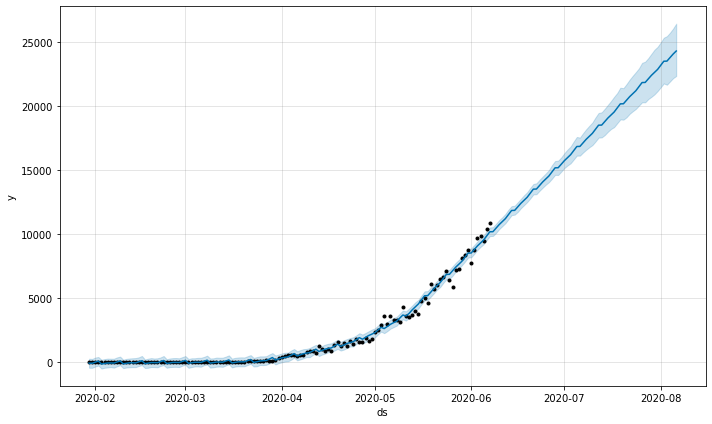

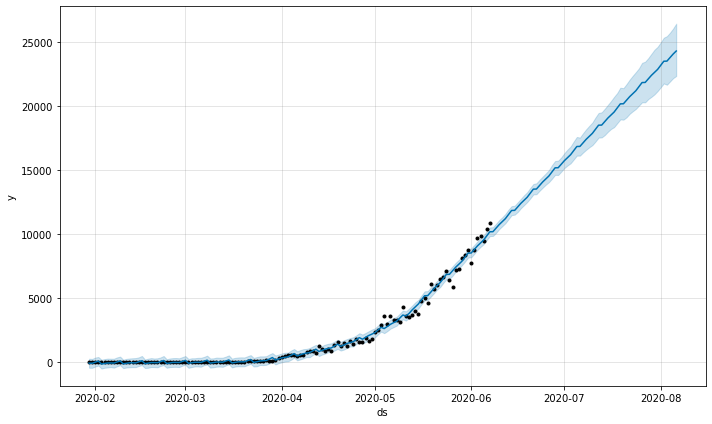

In [59]:
m.plot(forecast)

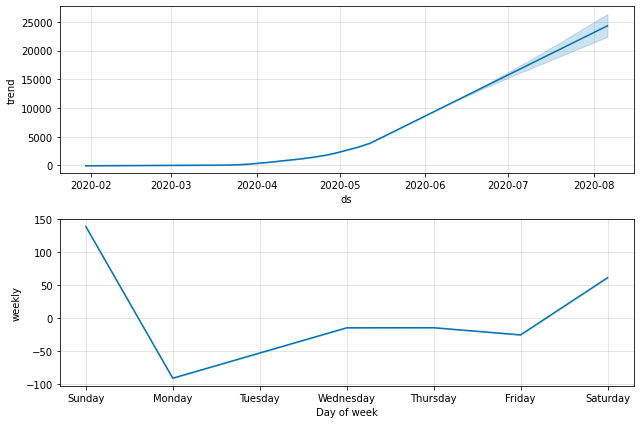

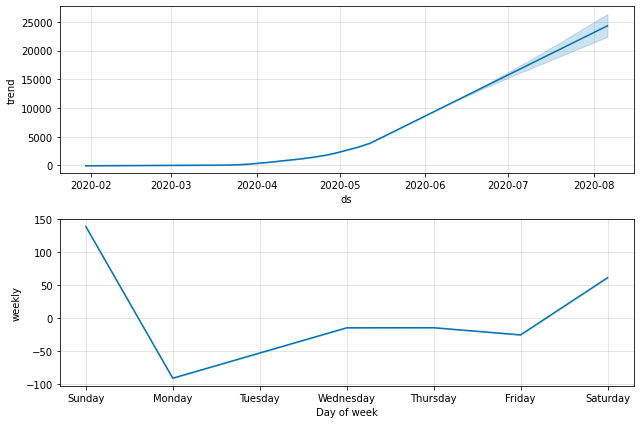

In [60]:
m.plot_components(forecast)